<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>

Here is some simple content for this page.
[{'title': 'Trump gewinnt auch in New Hampshire, aber Haley gibt nicht auf:\xa0«Dieses Rennen ist noch lange nicht vorbei»', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'https://www.nzz.ch/startseite.rss', 'value': 'Trump gewinnt auch in New Hampshire, aber Haley gibt nicht auf:\xa0«Dieses Rennen ist noch lange nicht vorbei»'}, 'summary': 'Nikki Haley konnte den Rückstand in New Hampshire in Grenzen halten. Aber auch in dieser Vorwahl ist ihr keine Überraschung gelungen. Nun deutet fast alles auf ein erneutes Duell zwischen Trump und Biden hin.', 'summary_detail': {'type': 'text/html', 'language': None, 'base': 'https://www.nzz.ch/startseite.rss', 'value': 'Nikki Haley konnte den Rückstand in New Hampshire in Grenzen halten. Aber auch in dieser Vorwahl is

/tmp/ipykernel_31334/516303459.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'].iloc[3] = np.nan
/tmp/ipykernel_31334/516303459.py:59: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear')


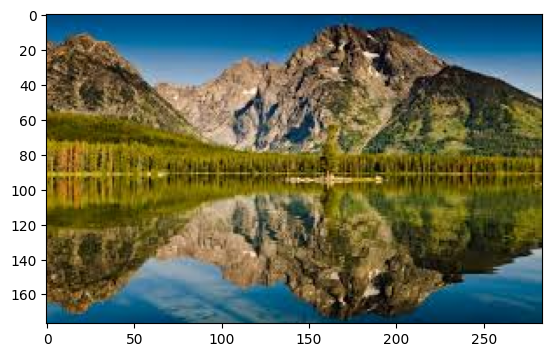

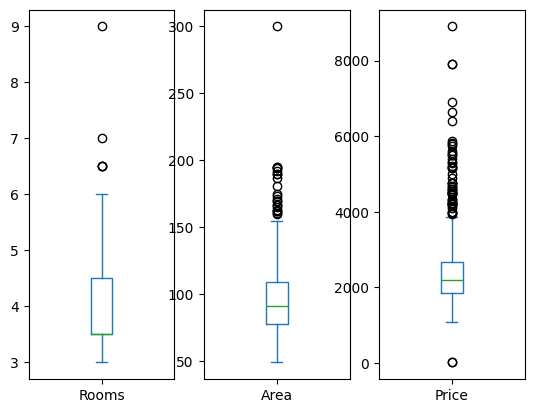

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL
import sqlite3
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()
cursor.execute('''SELECT * FROM apartments_table WHERE Rooms >= 3.0''')
df = pd.DataFrame(cursor.fetchall(), columns=['OrderId','Rooms','Area','Price'])
df.to_sql('appartments', conn, if_exists='replace')
cursor.execute("UPDATE appartments SET Rooms = 10 WHERE OrderId = '1662023695-433'")
cursor.execute("INSERT INTO appartments (OrderId, Rooms) VALUES (10, 100)")
cursor.execute("DELETE FROM appartments WHERE Rooms > 11")
conn.commit()
dfr = pd.read_sql("select min(rooms), avg(rooms) from appartments ORDER BY Rooms desc", con=conn)

# MongoDB
'''
db.orders.aggregate([
  {
    "$lookup": {
      "from": "inventory",
      "localField": "item",
      "foreignField": "sku",
      "as": "inventory_docs"
    }
  }
])
'''


# Request
import feedparser
import requests
from bs4 import BeautifulSoup
import lxml.html
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(BeautifulSoup(page.content, 'html.parser').prettify()) # nice HTML
print(lxml.html.fromstring(page.text).xpath('//p[1]')[0].text_content()) # also .tag or .getparent()
print(feedparser.parse("https://www.nzz.ch/startseite.rss").entries)

# Files
import PyPDF2
data = pd.read_csv("example.csv", sep=";", encoding='utf-8')
data = pd.read_json("example.json")
data = pd.read_csv("archive.zip", sep=";")
data = pd.read_excel("example.xlsx", sheet_name = "sheet1")
text = PyPDF2.PdfReader(open('example.pdf', 'rb')).pages[0].extract_text()
image = plt.imread('example.jpeg')
plt.imshow(image)

# Pandas
df.info() # tech
df.describe() # stats
df.plot(kind="box", subplots=True)
df.merge(data, left_on='Price', right_on='Var1')
df['Price'].iloc[3] = np.nan
df.interpolate(method='linear')
df.duplicated().sum()
df.drop_duplicates()
df.rename(columns={'Rooms': 'rooms'})
df.drop(columns=['Rooms'])
df.dropna()
df.shape # (entries, columns)
df['Price'].kurtosis() # high = heavy tails
df['Price'].skew()

# Outliers
for label, content in df[['Price', 'Area']].dropna().items():
    Q1 = content.quantile(0.25)
    Q3 = content.quantile(0.75)
    IQR = Q3 - Q1
    v_col = content[(content <= Q1 - 1.5 * IQR) | (content >= Q3 + 1.5 * IQR)]
    perc = (len(v_col) / len(df)) * 100
    print("Spalte {} Anteil an Outliers = {}%".format(label, round(perc, 2)))


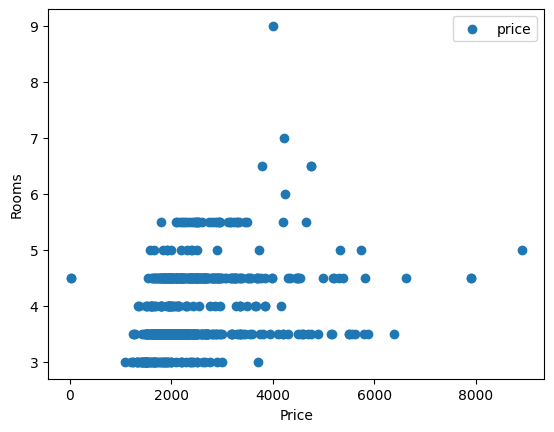

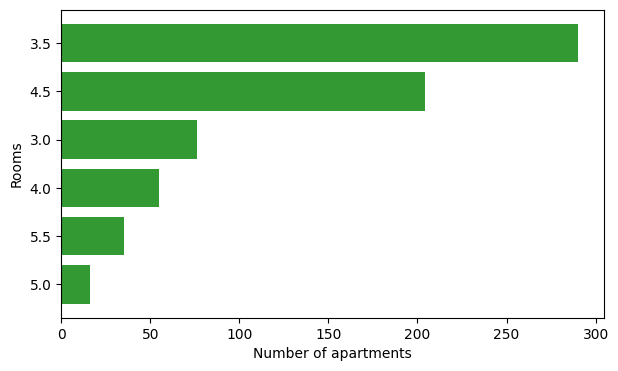

In [71]:
# Charts
price = plt.scatter(df['Price'], df['Rooms'])
plt.xlabel('Price')
plt.ylabel('Rooms')
plt.legend(handles=[price], labels = ['price'])

df_bar = df['Rooms'].value_counts().nlargest(6).sort_values(ascending=True)
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

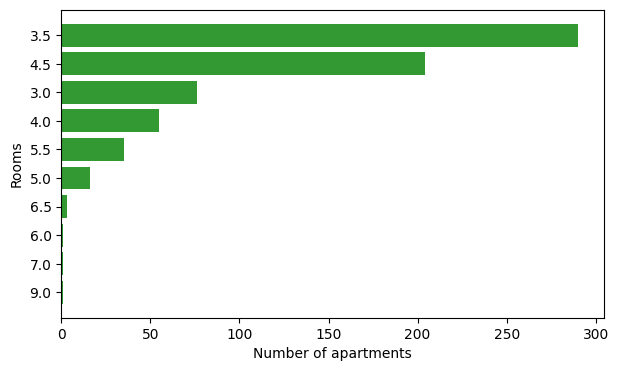

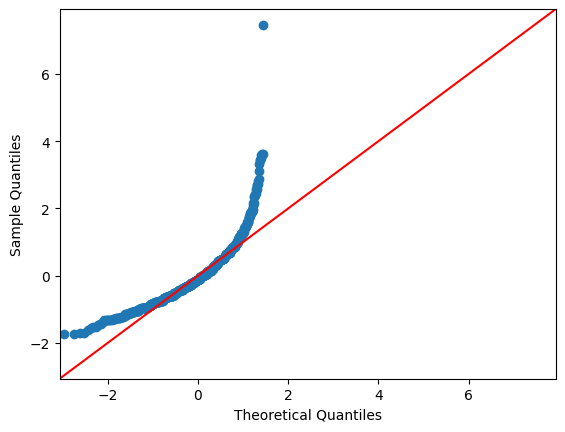

In [55]:
# QQ
import statsmodels.api as sm
import pylab as py
# red line normal distrib
df['var'] = (df['Area']-df['Area'].mean()) / df["Area"].std()
sm.qqplot(df['var'], line ='45')
py.show()